In [ ]:
from numpy import zeros, ones, expand_dims, asarray

from numpy.random import randn, randint

from keras.datasets import fashion_mnist

from keras.optimizers import Adam

from keras.models import Model, load_model

from keras.layers import Input, Dense, Reshape, Flatten

from keras.layers import Conv2D, Conv2DTranspose, Concatenate

from keras.layers import LeakyReLU, Dropout, Embedding

from keras.layers import BatchNormalization, Activation

from keras import initializers

from keras.initializers import RandomNormal

from keras.optimizers import Adam, RMSprop, SGD

from matplotlib import pyplot

import numpy as np

from math import sqrt

In [ ]:

(X_train, _), (_, _) = fashion_mnist.load_data()

X_train = X_train.astype(np.float32) / 127.5 - 1

X_train = np.expand_dims(X_train, axis=3)

print(X_train.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:


def define_discriminator(in_shape=(28, 28, 1)):

    in_image = Input(shape=in_shape)

    fe = Flatten()(in_image)

    fe = Dense(1024)(fe)

    fe = LeakyReLU(alpha=0.2)(fe)

    fe = Dropout(0.3)(fe)

    fe = Dense(512)(fe)

    fe = LeakyReLU(alpha=0.2)(fe)

    fe = Dropout(0.3)(fe)

    fe = Dense(256)(fe)

    fe = LeakyReLU(alpha=0.2)(fe)

    fe = Dropout(0.3)(fe)

    out = Dense(1, activation='sigmoid')(fe)

    model = Model(in_image, out)

    opt = Adam(lr=0.0002, beta_1=0.5)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

discriminator = define_discriminator()

def define_generator(latent_dim):

    init  = RandomNormal(stddev=0.02) #generates an array of specified shapes and fills it with random values, which is actually a part of Normal (Gaussian)Distribution

    in_lat = Input(shape=(latent_dim,))

    gen = Dense(256, kernel_initializer=init)(in_lat)

    gen = LeakyReLU(alpha=0.2)(gen)

    gen = Dense(512, kernel_initializer=init)(gen)

    gen = LeakyReLU(alpha=0.2)(gen)

    gen = Dense(1024, kernel_initializer=init)(gen)

    gen = LeakyReLU(alpha=0.2)(gen)

    gen = Dense(28 * 28 * 1, kernel_initializer=init)(gen)

    out_layer = Activation('tanh')(gen)

    out_layer = Reshape((28, 28, 1))(gen)

    model = Model(in_lat, out_layer)

    return model

generator = define_generator(100)

def define_gan(g_model, d_model):

    d_model.trainable = False

    gan_output = d_model(g_model.output)

    model = Model(g_model.input, gan_output)

    opt = Adam(lr=0.0002, beta_1=0.5)

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

gan_model = define_gan(generator, discriminator)



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
def generate_latent_points(latent_dim, n_samples):

    x_input = randn(latent_dim * n_samples)   #creates an array of specified shape and fills it with random values as per standard normal distribution

    z_input = x_input.reshape(n_samples, latent_dim)

    return z_input

def generate_real_samples(X_train, n_samples):

    ix = randint(0, X_train.shape[0], n_samples)  # returns an integer number selected element from the specified range.

    X = X_train[ix]

    y = ones((n_samples, 1))

    return X, y

def generate_fake_samples(generator, latent_dim, n_samples):

    z_input = generate_latent_points(latent_dim, n_samples)

    images = generator.predict(z_input)

    y = zeros((n_samples, 1))

    return images, y


#generating a fake sample, plotting it, and finally saving the model.

def summarize_performance(step, g_model, latent_dim, n_samples=100):

    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)

    X = (X + 1) / 2.0

    for i in range(100):

        pyplot.subplot(10, 10, 1 + i)

        pyplot.axis('off')

        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')

    filename2 = 'model_%04d.h5' % (step+1)

    g_model.save(filename2)

    print('>Saved: %s' % (filename2))


#plot the generated images by the  Generator in later stages.
def save_plot(examples, n_examples):

    for i in range(n_examples):

        pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)

        pyplot.axis('off')

        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')

    pyplot.show()


2/2 [==============================] - 1s 16ms/step
>1, dr[0.511,0.812], df[0.701,0.000], g[0.687,1.000]
2/2 [==============================] - 0s 16ms/step
>2, dr[0.050,1.000], df[0.711,0.000], g[0.678,1.000]
2/2 [==============================] - 0s 19ms/step
>3, dr[0.029,1.000], df[0.724,0.000], g[0.668,1.000]
2/2 [==============================] - 0s 14ms/step
>4, dr[0.011,1.000], df[0.742,0.000], g[0.656,1.000]
2/2 [==============================] - 0s 15ms/step
>5, dr[0.012,1.000], df[0.758,0.000], g[0.641,1.000]
2/2 [==============================] - 0s 15ms/step
>6, dr[0.009,1.000], df[0.784,0.000], g[0.630,1.000]
2/2 [==============================] - 0s 16ms/step
>7, dr[0.008,1.000], df[0.798,0.000], g[0.615,1.000]
2/2 [==============================] - 0s 19ms/step
>8, dr[0.010,1.000], df[0.825,0.000], g[0.615,1.000]
2/2 [==============================] - 0s 11ms/step
>9, dr[0.011,1.000], df[0.819,0.000], g[0.619,1.000]
2/2 [==============================] - 0s 18ms/step
>10

>Saved: model_0937.h5
2/2 [==============================] - 0s 12ms/step
>938, dr[0.239,0.922], df[0.133,0.969], g[3.885,0.016]
2/2 [==============================] - 0s 11ms/step
>939, dr[0.341,0.812], df[0.313,0.984], g[3.943,0.000]
2/2 [==============================] - 0s 11ms/step
>940, dr[0.159,0.906], df[0.172,0.953], g[4.304,0.000]
2/2 [==============================] - 0s 10ms/step
>941, dr[0.493,0.797], df[0.410,0.844], g[3.988,0.000]
2/2 [==============================] - 0s 12ms/step
>942, dr[0.126,0.938], df[0.042,1.000], g[3.897,0.000]
2/2 [==============================] - 0s 15ms/step
>943, dr[0.281,0.891], df[0.138,0.984], g[3.359,0.000]
2/2 [==============================] - 0s 11ms/step
>944, dr[0.102,0.953], df[0.216,0.953], g[4.115,0.000]
2/2 [==============================] - 0s 11ms/step
>945, dr[0.273,0.828], df[0.186,0.938], g[3.929,0.016]
2/2 [==============================] - 0s 15ms/step
>946, dr[0.309,0.844], df[0.268,0.922], g[4.912,0.000]
2/2 [==========

>Saved: model_1874.h5
2/2 [==============================] - 0s 14ms/step
>1875, dr[0.469,0.703], df[0.270,0.969], g[2.059,0.000]
2/2 [==============================] - 0s 16ms/step
>1876, dr[0.408,0.797], df[0.311,0.953], g[2.196,0.000]
2/2 [==============================] - 0s 19ms/step
>1877, dr[0.365,0.766], df[0.319,0.891], g[2.264,0.016]
2/2 [==============================] - 0s 11ms/step
>1878, dr[0.375,0.781], df[0.348,0.906], g[2.493,0.000]
2/2 [==============================] - 0s 18ms/step
>1879, dr[0.296,0.828], df[0.200,0.969], g[2.536,0.000]
2/2 [==============================] - 0s 11ms/step
>1880, dr[0.261,0.844], df[0.200,0.953], g[2.628,0.000]
2/2 [==============================] - 0s 15ms/step
>1881, dr[0.323,0.844], df[0.250,0.922], g[2.749,0.000]
2/2 [==============================] - 0s 12ms/step
>1882, dr[0.445,0.703], df[0.261,0.922], g[2.788,0.016]
2/2 [==============================] - 0s 14ms/step
>1883, dr[0.563,0.656], df[0.262,0.938], g[2.044,0.016]
2/2 [=

>Saved: model_2811.h5
2/2 [==============================] - 0s 13ms/step
>2812, dr[0.260,0.844], df[0.292,0.906], g[2.377,0.016]
2/2 [==============================] - 0s 21ms/step
>2813, dr[0.368,0.797], df[0.225,0.938], g[2.521,0.047]
2/2 [==============================] - 0s 14ms/step
>2814, dr[0.546,0.688], df[0.350,0.891], g[2.404,0.016]
2/2 [==============================] - 0s 11ms/step
>2815, dr[0.315,0.828], df[0.175,1.000], g[2.244,0.016]
2/2 [==============================] - 0s 12ms/step
>2816, dr[0.380,0.781], df[0.484,0.781], g[2.562,0.016]
2/2 [==============================] - 0s 13ms/step
>2817, dr[0.406,0.781], df[0.170,1.000], g[2.564,0.000]
2/2 [==============================] - 0s 12ms/step
>2818, dr[0.535,0.719], df[0.316,0.906], g[2.256,0.016]
2/2 [==============================] - 0s 17ms/step
>2819, dr[0.218,0.859], df[0.310,0.953], g[2.248,0.047]
2/2 [==============================] - 0s 12ms/step
>2820, dr[0.682,0.656], df[0.332,0.938], g[2.263,0.016]
2/2 [=

KeyboardInterrupt: ignored

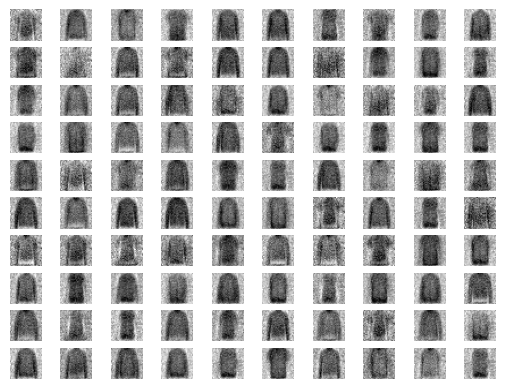

In [ ]:
def train(g_model, d_model, gan_model, X_train, latent_dim, n_epochs=100, n_batch=64):

    bat_per_epo = int(X_train.shape[0] / n_batch)

    n_steps = bat_per_epo * n_epochs

    for i in range(n_steps):

        X_real, y_real = generate_real_samples(X_train, n_batch)

        d_loss_r, d_acc_r = d_model.train_on_batch(X_real, y_real)

        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)

        d_loss_f, d_acc_f = d_model.train_on_batch(X_fake, y_fake)

        z_input = generate_latent_points(latent_dim, n_batch)

        y_gan = ones((n_batch, 1))

        g_loss, g_acc = gan_model.train_on_batch(z_input, y_gan)

        print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_loss_r,d_acc_r, d_loss_f,d_acc_f, g_loss,g_acc))

        if (i+1) % (bat_per_epo * 1) == 0:

            summarize_performance(i, g_model, latent_dim)

latent_dim = 100

train(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=20, n_batch=64)

model = load_model('model_18740.h5')

latent_dim = 100

n_examples = 100

latent_points = generate_latent_points(latent_dim, n_examples)

X  = model.predict(latent_points)

X = (X + 1) / 2.0

save_plot(X, n_examples)